In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("newfeature.csv",low_memory=False)

In [3]:
data.describe()

,Mean,S.D1,Variance,Kurtotis1,Skew1,Entrophy1,Class
count,1.569000e+03,1.569000e+03,1.569000e+03,1569.000000,1569.000000,1569.000000,1569.000000
mean,5.745310e+04,7.610203e+06,7.745973e+14,214.028108,376.368060,36.274087,3.084130
std,3.429913e+05,4.639065e+07,7.952103e+15,96.110372,160.334041,20.113797,2.887881
min,5.713131e-02,8.951112e+00,4.006120e+01,53.852610,142.304766,0.069054,0.000000
25%,1.416747e+01,2.142272e+03,3.046807e+06,148.000949,236.135860,18.472910,0.000000
50%,4.746895e+02,6.279599e+04,2.527383e+09,191.293560,345.143504,31.200402,2.000000
75%,4.604160e+03,6.256123e+05,2.283390e+11,279.978971,494.730783,55.877330,5.000000
max,4.635434e+06,6.992452e+08,1.630000e+17,648.975640,847.222371,97.910728,9.000000


In [4]:
Y=data.pop("Class")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [6]:
X_2d = tsne.fit_transform(data)

In [7]:
target_names=["0","1","2","3","4","5","6","7","8","9"]

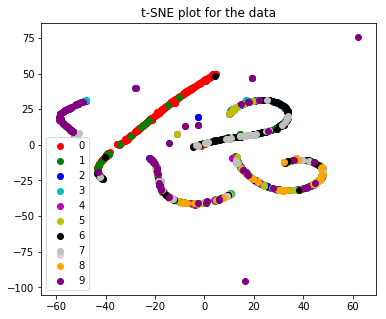

In [18]:
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[Y == i, 0], X_2d[Y == i, 1], c=c, label=label)
plt.legend( loc='lower left')
#plt.savefig('t-SNE.fig', format='eps', dpi=1000)
#plt.savefig('t-SNE.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from numpy import nan

now = datetime.datetime.now

Using TensorFlow backend.


In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [11]:
from numpy import argmax
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(data, Y, random_state = 42)
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)



In [12]:
print(X_train.shape[0])
print(X_test.shape[0])
dims = X_train.shape[1]
print(dims, 'dims')
print("Building model...")

1176
393
6 dims
Building model...


In [13]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

#print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
#print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test - min_train)/range_train

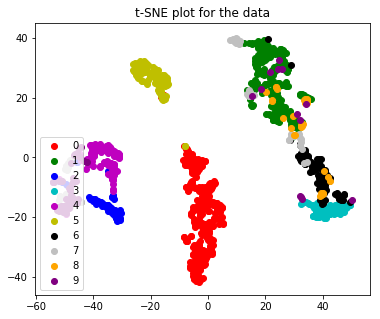

In [26]:
X_2d = tsne.fit_transform(X_train_scaled)
target_names=["0","1","2","3","4","5","6","7","8","9"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_train == i, 0], X_2d[y_train == i, 1], c=c, label=label)
plt.legend( loc='lower left')
#plt.savefig('t-SNE_for_scaled.fig', format='eps', dpi=1000)
#plt.savefig('t-SNE_for_scaled.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

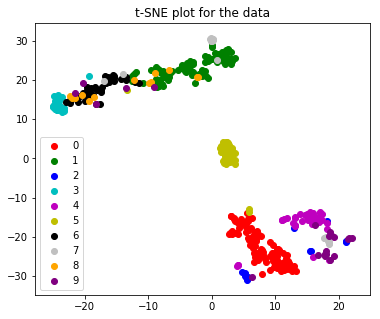

In [27]:
X_2d = tsne.fit_transform(X_test_scaled)
target_names=["0","1","2","3","4","5","6","7","8","9"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_test == i, 0], X_2d[y_test == i, 1], c=c, label=label)
plt.legend( loc='lower left')
#plt.savefig('t-SNE_for_scaled_testdata.fig', format='eps', dpi=1000)
#plt.savefig('t-SNE_for_scaled_testdata.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [14]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist1=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])


Train on 1176 samples, validate on 393 samples
Epoch 1/3000
1176/1176 [==============================] - 2s 2ms/step - loss: 2.2837 - acc: 0.1241 - val_loss: 2.2521 - val_acc: 0.2545
Epoch 2/3000
1176/1176 [==============================] - 0s 65us/step - loss: 2.2179 - acc: 0.2594 - val_loss: 2.1829 - val_acc: 0.2519
Epoch 3/3000
1176/1176 [==============================] - 0s 65us/step - loss: 2.1371 - acc: 0.2594 - val_loss: 2.0898 - val_acc: 0.2519
Epoch 4/3000
1176/1176 [==============================] - 0s 65us/step - loss: 2.0259 - acc: 0.2611 - val_loss: 1.9657 - val_acc: 0.2672
Epoch 5/3000
1176/1176 [==============================] - 0s 68us/step - loss: 1.8888 - acc: 0.3571 - val_loss: 1.8162 - val_acc: 0.4071
Epoch 6/3000
1176/1176 [==============================] - 0s 65us/step - loss: 1.7396 - acc: 0.4481 - val_loss: 1.6600 - val_acc: 0.4758
Epoch 7/3000
1176/1176 [==============================] - 0s 71us/step - loss: 1.5930 - acc: 0.4702 - val_loss: 1.5175 - val_acc: 0.

1176/1176 [==============================] - 0s 58us/step - loss: 0.3207 - acc: 0.9031 - val_loss: 0.3738 - val_acc: 0.9160
Epoch 61/3000
1176/1176 [==============================] - 0s 68us/step - loss: 0.3193 - acc: 0.9014 - val_loss: 0.3715 - val_acc: 0.9109
Epoch 62/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.3184 - acc: 0.9031 - val_loss: 0.3728 - val_acc: 0.9160
Epoch 63/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.3172 - acc: 0.9031 - val_loss: 0.3668 - val_acc: 0.9186
Epoch 64/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.3208 - acc: 0.9056 - val_loss: 0.3673 - val_acc: 0.9211
Epoch 65/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.3135 - acc: 0.9065 - val_loss: 0.3740 - val_acc: 0.9160
Epoch 66/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.3103 - acc: 0.9073 - val_loss: 0.3623 - val_acc: 0.9135
Epoch 67/3000
1176/1176 [=======================

1176/1176 [==============================] - 0s 65us/step - loss: 0.2512 - acc: 0.9158 - val_loss: 0.3106 - val_acc: 0.9211
Epoch 120/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.2489 - acc: 0.9158 - val_loss: 0.3117 - val_acc: 0.9186
Epoch 121/3000
1176/1176 [==============================] - 0s 68us/step - loss: 0.2493 - acc: 0.9158 - val_loss: 0.3112 - val_acc: 0.9135
Epoch 122/3000
1176/1176 [==============================] - 0s 58us/step - loss: 0.2483 - acc: 0.9167 - val_loss: 0.3097 - val_acc: 0.9211
Epoch 123/3000
1176/1176 [==============================] - 0s 68us/step - loss: 0.2514 - acc: 0.9133 - val_loss: 0.3090 - val_acc: 0.9186
Epoch 124/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.2488 - acc: 0.9150 - val_loss: 0.3079 - val_acc: 0.9237
Epoch 125/3000
1176/1176 [==============================] - 0s 68us/step - loss: 0.2472 - acc: 0.9141 - val_loss: 0.3098 - val_acc: 0.9211
Epoch 126/3000
1176/1176 [================

1176/1176 [==============================] - 0s 61us/step - loss: 0.2190 - acc: 0.9201 - val_loss: 0.2838 - val_acc: 0.9288
Epoch 179/3000
1176/1176 [==============================] - 0s 58us/step - loss: 0.2169 - acc: 0.9226 - val_loss: 0.2822 - val_acc: 0.9288
Epoch 180/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.2167 - acc: 0.9235 - val_loss: 0.2811 - val_acc: 0.9313
Epoch 181/3000
1176/1176 [==============================] - 0s 60us/step - loss: 0.2150 - acc: 0.9209 - val_loss: 0.2842 - val_acc: 0.9288
Epoch 182/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.2155 - acc: 0.9235 - val_loss: 0.2836 - val_acc: 0.9338
Epoch 183/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.2151 - acc: 0.9209 - val_loss: 0.2838 - val_acc: 0.9262
Epoch 184/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.2162 - acc: 0.9235 - val_loss: 0.2793 - val_acc: 0.9313
Epoch 185/3000
1176/1176 [================

1176/1176 [==============================] - 0s 61us/step - loss: 0.1916 - acc: 0.9277 - val_loss: 0.2658 - val_acc: 0.9237
Epoch 238/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.1902 - acc: 0.9269 - val_loss: 0.2647 - val_acc: 0.9288
Epoch 239/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.1928 - acc: 0.9269 - val_loss: 0.2723 - val_acc: 0.9186
Epoch 240/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.1924 - acc: 0.9286 - val_loss: 0.2609 - val_acc: 0.9338
Epoch 241/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1910 - acc: 0.9277 - val_loss: 0.2695 - val_acc: 0.9237
Epoch 242/3000
1176/1176 [==============================] - 0s 61us/step - loss: 0.1905 - acc: 0.9328 - val_loss: 0.2599 - val_acc: 0.9313
Epoch 243/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1912 - acc: 0.9303 - val_loss: 0.2662 - val_acc: 0.9237
Epoch 244/3000
1176/1176 [================

1176/1176 [==============================] - 0s 68us/step - loss: 0.1714 - acc: 0.9371 - val_loss: 0.2440 - val_acc: 0.9364
Epoch 297/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1730 - acc: 0.9337 - val_loss: 0.2489 - val_acc: 0.9313
Epoch 298/3000
1176/1176 [==============================] - 0s 68us/step - loss: 0.1715 - acc: 0.9354 - val_loss: 0.2453 - val_acc: 0.9338
Epoch 299/3000
1176/1176 [==============================] - 0s 58us/step - loss: 0.1715 - acc: 0.9328 - val_loss: 0.2418 - val_acc: 0.9338
Epoch 300/3000
1176/1176 [==============================] - 0s 68us/step - loss: 0.1723 - acc: 0.9371 - val_loss: 0.2460 - val_acc: 0.9313
Epoch 301/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1712 - acc: 0.9371 - val_loss: 0.2487 - val_acc: 0.9288
Epoch 302/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1719 - acc: 0.9345 - val_loss: 0.2450 - val_acc: 0.9364
Epoch 303/3000
1176/1176 [================

1176/1176 [==============================] - 0s 58us/step - loss: 0.1605 - acc: 0.9388 - val_loss: 0.2395 - val_acc: 0.9313
Epoch 356/3000
1176/1176 [==============================] - 0s 58us/step - loss: 0.1543 - acc: 0.9439 - val_loss: 0.2444 - val_acc: 0.9338
Epoch 357/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1563 - acc: 0.9447 - val_loss: 0.2376 - val_acc: 0.9288
Epoch 358/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1532 - acc: 0.9439 - val_loss: 0.2435 - val_acc: 0.9288
Epoch 359/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1543 - acc: 0.9371 - val_loss: 0.2386 - val_acc: 0.9313
Epoch 360/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1539 - acc: 0.9422 - val_loss: 0.2321 - val_acc: 0.9313
Epoch 361/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.1565 - acc: 0.9413 - val_loss: 0.2431 - val_acc: 0.9211
Epoch 362/3000
1176/1176 [================

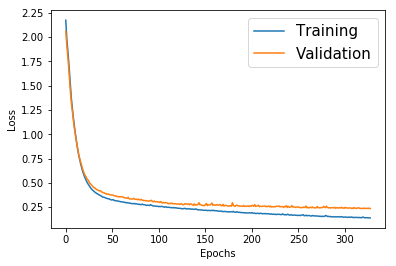

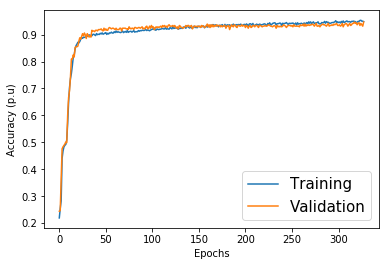

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
#plt.savefig('loss with adam.fig', format='eps', dpi=1000)
#plt.savefig('loss with adam.eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (p.u)')
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
#plt.savefig('accuracy with adam.fig', format='eps', dpi=1000)
#plt.savefig('accuracy with adam.eps', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [34]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 39)                273       
_________________________________________________________________
activation_7 (Activation)    (None, 39)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1000      
_________________________________________________________________
activation_8 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                260       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 1,533
Trainable params: 1,533
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(29, input_shape=(dims,)))
m.add(Activation('softmax'))
m.add(Dense(20))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=1500, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1176 samples, validate on 393 samples
Epoch 1/1500
1176/1176 [==============================] - 1s 488us/step - loss: 2.2907 - acc: 0.1182 - val_loss: 2.2764 - val_acc: 0.2443
Epoch 2/1500
1176/1176 [==============================] - 0s 65us/step - loss: 2.2634 - acc: 0.2526 - val_loss: 2.2440 - val_acc: 0.2443
Epoch 3/1500
1176/1176 [==============================] - 0s 62us/step - loss: 2.2288 - acc: 0.2526 - val_loss: 2.2049 - val_acc: 0.2443
Epoch 4/1500
1176/1176 [==============================] - 0s 67us/step - loss: 2.1898 - acc: 0.2526 - val_loss: 2.1610 - val_acc: 0.2443
Epoch 5/1500
1176/1176 [==============================] - 0s 60us/step - loss: 2.1511 - acc: 0.2526 - val_loss: 2.1214 - val_acc: 0.2443
Epoch 6/1500
1176/1176 [==============================] - 0s 67us/step - loss: 2.1220 - acc: 0.2526 - val_loss: 2.0932 - val_acc: 0.2443
Epoch 7/1500
1176/1176 [==============================] - 0s 64us/step - loss: 2.1039 - acc: 0.2526 - val_loss: 2.0779 - val_acc: 

1176/1176 [==============================] - 0s 67us/step - loss: 0.9792 - acc: 0.6845 - val_loss: 0.9781 - val_acc: 0.6794
Epoch 61/1500
1176/1176 [==============================] - 0s 62us/step - loss: 0.9715 - acc: 0.6726 - val_loss: 0.9713 - val_acc: 0.6768
Epoch 62/1500
1176/1176 [==============================] - 0s 58us/step - loss: 0.9635 - acc: 0.6837 - val_loss: 0.9625 - val_acc: 0.6947
Epoch 63/1500
1176/1176 [==============================] - 0s 58us/step - loss: 0.9552 - acc: 0.6803 - val_loss: 0.9565 - val_acc: 0.6921
Epoch 64/1500
1176/1176 [==============================] - 0s 60us/step - loss: 0.9480 - acc: 0.6828 - val_loss: 0.9476 - val_acc: 0.6896
Epoch 65/1500
1176/1176 [==============================] - 0s 51us/step - loss: 0.9398 - acc: 0.6888 - val_loss: 0.9411 - val_acc: 0.6947
Epoch 66/1500
1176/1176 [==============================] - 0s 61us/step - loss: 0.9321 - acc: 0.6828 - val_loss: 0.9348 - val_acc: 0.6972
Epoch 67/1500
1176/1176 [=======================

1176/1176 [==============================] - 0s 66us/step - loss: 0.5712 - acc: 0.8248 - val_loss: 0.6070 - val_acc: 0.8041
Epoch 179/1500
1176/1176 [==============================] - 0s 69us/step - loss: 0.5700 - acc: 0.8231 - val_loss: 0.6045 - val_acc: 0.8066
Epoch 180/1500
1176/1176 [==============================] - 0s 60us/step - loss: 0.5684 - acc: 0.8325 - val_loss: 0.6019 - val_acc: 0.8092
Epoch 181/1500
1176/1176 [==============================] - 0s 52us/step - loss: 0.5679 - acc: 0.8214 - val_loss: 0.6005 - val_acc: 0.8066
Epoch 182/1500
1176/1176 [==============================] - 0s 70us/step - loss: 0.5665 - acc: 0.8248 - val_loss: 0.6018 - val_acc: 0.8092
Epoch 183/1500
1176/1176 [==============================] - 0s 63us/step - loss: 0.5645 - acc: 0.8308 - val_loss: 0.5987 - val_acc: 0.8066
Epoch 184/1500
1176/1176 [==============================] - 0s 65us/step - loss: 0.5641 - acc: 0.8308 - val_loss: 0.5983 - val_acc: 0.8066
Epoch 185/1500
1176/1176 [================

1176/1176 [==============================] - 0s 65us/step - loss: 0.5053 - acc: 0.8435 - val_loss: 0.5497 - val_acc: 0.8193
Epoch 238/1500
1176/1176 [==============================] - 0s 69us/step - loss: 0.5036 - acc: 0.8461 - val_loss: 0.5504 - val_acc: 0.8219
Epoch 239/1500
1176/1176 [==============================] - 0s 52us/step - loss: 0.5038 - acc: 0.8452 - val_loss: 0.5477 - val_acc: 0.8219
Epoch 240/1500
1176/1176 [==============================] - 0s 67us/step - loss: 0.5021 - acc: 0.8444 - val_loss: 0.5471 - val_acc: 0.8193
Epoch 241/1500
1176/1176 [==============================] - 0s 52us/step - loss: 0.5020 - acc: 0.8461 - val_loss: 0.5475 - val_acc: 0.8244
Epoch 242/1500
1176/1176 [==============================] - 0s 61us/step - loss: 0.5005 - acc: 0.8444 - val_loss: 0.5460 - val_acc: 0.8244
Epoch 243/1500
1176/1176 [==============================] - 0s 62us/step - loss: 0.5005 - acc: 0.8444 - val_loss: 0.5444 - val_acc: 0.8270
Epoch 244/1500
1176/1176 [================

1176/1176 [==============================] - 0s 65us/step - loss: 0.4375 - acc: 0.8614 - val_loss: 0.4806 - val_acc: 0.8524
Epoch 297/1500
1176/1176 [==============================] - 0s 71us/step - loss: 0.4353 - acc: 0.8631 - val_loss: 0.4761 - val_acc: 0.8575
Epoch 298/1500
1176/1176 [==============================] - 0s 42us/step - loss: 0.4335 - acc: 0.8648 - val_loss: 0.4734 - val_acc: 0.8550
Epoch 299/1500
1176/1176 [==============================] - 0s 66us/step - loss: 0.4318 - acc: 0.8648 - val_loss: 0.4716 - val_acc: 0.8575
Epoch 300/1500
1176/1176 [==============================] - 0s 63us/step - loss: 0.4293 - acc: 0.8699 - val_loss: 0.4688 - val_acc: 0.8626
Epoch 301/1500
1176/1176 [==============================] - 0s 63us/step - loss: 0.4270 - acc: 0.8673 - val_loss: 0.4667 - val_acc: 0.8626
Epoch 302/1500
1176/1176 [==============================] - 0s 60us/step - loss: 0.4252 - acc: 0.8690 - val_loss: 0.4628 - val_acc: 0.8601
Epoch 303/1500
1176/1176 [================

1176/1176 [==============================] - 0s 66us/step - loss: 0.3503 - acc: 0.8886 - val_loss: 0.3793 - val_acc: 0.8906
Epoch 356/1500
1176/1176 [==============================] - 0s 59us/step - loss: 0.3478 - acc: 0.8920 - val_loss: 0.3786 - val_acc: 0.9008
Epoch 357/1500
1176/1176 [==============================] - 0s 65us/step - loss: 0.3480 - acc: 0.8903 - val_loss: 0.3782 - val_acc: 0.9008
Epoch 358/1500
1176/1176 [==============================] - 0s 57us/step - loss: 0.3471 - acc: 0.8946 - val_loss: 0.3766 - val_acc: 0.8906
Epoch 359/1500
1176/1176 [==============================] - 0s 67us/step - loss: 0.3469 - acc: 0.8903 - val_loss: 0.3768 - val_acc: 0.8957
Epoch 360/1500
1176/1176 [==============================] - 0s 46us/step - loss: 0.3456 - acc: 0.8920 - val_loss: 0.3764 - val_acc: 0.8982
Epoch 361/1500
1176/1176 [==============================] - 0s 62us/step - loss: 0.3456 - acc: 0.8920 - val_loss: 0.3754 - val_acc: 0.8957
Epoch 362/1500
1176/1176 [================

1176/1176 [==============================] - 0s 65us/step - loss: 0.3238 - acc: 0.8980 - val_loss: 0.3503 - val_acc: 0.9084
Epoch 415/1500
1176/1176 [==============================] - 0s 66us/step - loss: 0.3231 - acc: 0.8971 - val_loss: 0.3529 - val_acc: 0.9033
Epoch 416/1500
1176/1176 [==============================] - 0s 63us/step - loss: 0.3226 - acc: 0.8988 - val_loss: 0.3514 - val_acc: 0.9059
Epoch 417/1500
1176/1176 [==============================] - 0s 61us/step - loss: 0.3224 - acc: 0.9014 - val_loss: 0.3531 - val_acc: 0.9033
Epoch 418/1500
1176/1176 [==============================] - 0s 61us/step - loss: 0.3230 - acc: 0.9014 - val_loss: 0.3510 - val_acc: 0.9059
Epoch 419/1500
1176/1176 [==============================] - 0s 43us/step - loss: 0.3221 - acc: 0.8988 - val_loss: 0.3515 - val_acc: 0.9033
Epoch 420/1500
1176/1176 [==============================] - 0s 64us/step - loss: 0.3220 - acc: 0.8988 - val_loss: 0.3499 - val_acc: 0.9033
Epoch 421/1500
1176/1176 [================

1176/1176 [==============================] - 0s 65us/step - loss: 0.3120 - acc: 0.9022 - val_loss: 0.3420 - val_acc: 0.8982
Epoch 474/1500
1176/1176 [==============================] - 0s 65us/step - loss: 0.3108 - acc: 0.9056 - val_loss: 0.3385 - val_acc: 0.9059
Epoch 475/1500
1176/1176 [==============================] - 0s 57us/step - loss: 0.3092 - acc: 0.9031 - val_loss: 0.3367 - val_acc: 0.9059
Epoch 476/1500
1176/1176 [==============================] - 0s 65us/step - loss: 0.3089 - acc: 0.9039 - val_loss: 0.3387 - val_acc: 0.9033
Epoch 477/1500
1176/1176 [==============================] - 0s 64us/step - loss: 0.3094 - acc: 0.9014 - val_loss: 0.3377 - val_acc: 0.9059
Epoch 478/1500
1176/1176 [==============================] - 0s 59us/step - loss: 0.3085 - acc: 0.9014 - val_loss: 0.3393 - val_acc: 0.9033
Epoch 479/1500
1176/1176 [==============================] - 0s 63us/step - loss: 0.3089 - acc: 0.9022 - val_loss: 0.3381 - val_acc: 0.9059
Epoch 480/1500
1176/1176 [================

1176/1176 [==============================] - 0s 64us/step - loss: 0.3008 - acc: 0.9039 - val_loss: 0.3286 - val_acc: 0.9033
Epoch 533/1500
1176/1176 [==============================] - 0s 67us/step - loss: 0.3005 - acc: 0.9039 - val_loss: 0.3287 - val_acc: 0.9033
Epoch 534/1500
1176/1176 [==============================] - 0s 58us/step - loss: 0.2998 - acc: 0.9048 - val_loss: 0.3294 - val_acc: 0.9033
Epoch 535/1500
1176/1176 [==============================] - 0s 43us/step - loss: 0.3000 - acc: 0.9048 - val_loss: 0.3290 - val_acc: 0.9033
Epoch 536/1500
1176/1176 [==============================] - 0s 45us/step - loss: 0.3006 - acc: 0.9039 - val_loss: 0.3291 - val_acc: 0.8982
Epoch 537/1500
1176/1176 [==============================] - 0s 68us/step - loss: 0.2999 - acc: 0.9048 - val_loss: 0.3304 - val_acc: 0.9033
Epoch 538/1500
1176/1176 [==============================] - 0s 57us/step - loss: 0.2996 - acc: 0.9056 - val_loss: 0.3298 - val_acc: 0.9008
Epoch 539/1500
1176/1176 [================

1176/1176 [==============================] - 0s 64us/step - loss: 0.2925 - acc: 0.9073 - val_loss: 0.3212 - val_acc: 0.9084
Epoch 592/1500
1176/1176 [==============================] - 0s 65us/step - loss: 0.2919 - acc: 0.9056 - val_loss: 0.3211 - val_acc: 0.9084
Epoch 593/1500
1176/1176 [==============================] - 0s 61us/step - loss: 0.2927 - acc: 0.9073 - val_loss: 0.3177 - val_acc: 0.9084
Epoch 594/1500
1176/1176 [==============================] - 0s 64us/step - loss: 0.2929 - acc: 0.9048 - val_loss: 0.3210 - val_acc: 0.9084
Epoch 595/1500
1176/1176 [==============================] - 0s 44us/step - loss: 0.2912 - acc: 0.9073 - val_loss: 0.3195 - val_acc: 0.9160
Epoch 596/1500
1176/1176 [==============================] - 0s 67us/step - loss: 0.2931 - acc: 0.9048 - val_loss: 0.3208 - val_acc: 0.9059
Epoch 597/1500
1176/1176 [==============================] - 0s 62us/step - loss: 0.2918 - acc: 0.9048 - val_loss: 0.3200 - val_acc: 0.9109
Epoch 598/1500
1176/1176 [================

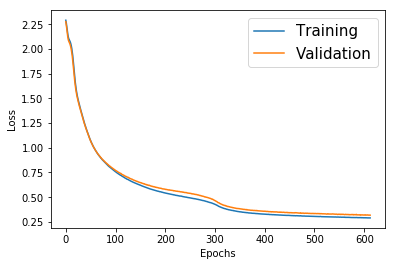

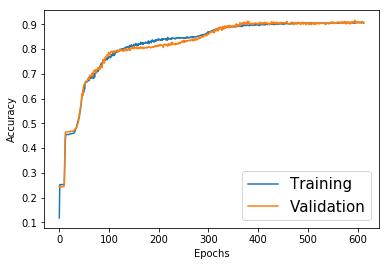

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.savefig('loss with adam(hist).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], prop={'size': 15})

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.savefig('accuracy with adam(hist).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [36]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist2=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1176 samples, validate on 393 samples
Epoch 1/3000
1176/1176 [==============================] - 1s 511us/step - loss: 2.2328 - acc: 0.1854 - val_loss: 2.1126 - val_acc: 0.2443
Epoch 2/3000
1176/1176 [==============================] - 0s 78us/step - loss: 2.0778 - acc: 0.2526 - val_loss: 2.0047 - val_acc: 0.2443
Epoch 3/3000
1176/1176 [==============================] - 0s 69us/step - loss: 1.9928 - acc: 0.2662 - val_loss: 1.9313 - val_acc: 0.4478
Epoch 4/3000
1176/1176 [==============================] - 0s 68us/step - loss: 1.8973 - acc: 0.4439 - val_loss: 1.8222 - val_acc: 0.4555
Epoch 5/3000
1176/1176 [==============================] - 0s 71us/step - loss: 1.7797 - acc: 0.4524 - val_loss: 1.7145 - val_acc: 0.4656
Epoch 6/3000
1176/1176 [==============================] - 0s 71us/step - loss: 1.6721 - acc: 0.4566 - val_loss: 1.6124 - val_acc: 0.4707
Epoch 7/3000
1176/1176 [==============================] - 0s 81us/step - loss: 1.5818 - acc: 0.4600 - val_loss: 1.5228 - val_acc: 

Epoch 60/3000
1176/1176 [==============================] - 0s 67us/step - loss: 0.3050 - acc: 0.9065 - val_loss: 0.3411 - val_acc: 0.9135
Epoch 61/3000
1176/1176 [==============================] - 0s 62us/step - loss: 0.3030 - acc: 0.9065 - val_loss: 0.3326 - val_acc: 0.9109
Epoch 62/3000
1176/1176 [==============================] - 0s 66us/step - loss: 0.3070 - acc: 0.9065 - val_loss: 0.3330 - val_acc: 0.9135
Epoch 63/3000
1176/1176 [==============================] - 0s 63us/step - loss: 0.2974 - acc: 0.9048 - val_loss: 0.3268 - val_acc: 0.9033
Epoch 64/3000
1176/1176 [==============================] - 0s 43us/step - loss: 0.3031 - acc: 0.9005 - val_loss: 0.3427 - val_acc: 0.9211
Epoch 65/3000
1176/1176 [==============================] - 0s 64us/step - loss: 0.3093 - acc: 0.9056 - val_loss: 0.3412 - val_acc: 0.9211
Epoch 66/3000
1176/1176 [==============================] - 0s 60us/step - loss: 0.2967 - acc: 0.9056 - val_loss: 0.3216 - val_acc: 0.9237
Epoch 67/3000
1176/1176 [=========

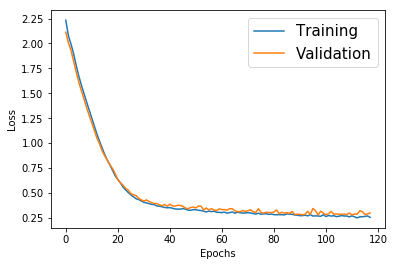

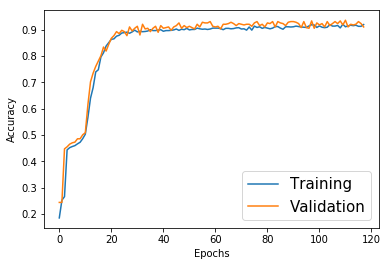

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist2).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist2)', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.savefig('accuracy with adam(hist2).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist2)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [39]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=rmsp,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist3=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1176 samples, validate on 393 samples
Epoch 1/3000
1176/1176 [==============================] - 1s 695us/step - loss: 2.2183 - acc: 0.2457 - val_loss: 2.1488 - val_acc: 0.2443
Epoch 2/3000
1176/1176 [==============================] - 0s 81us/step - loss: 2.0869 - acc: 0.2543 - val_loss: 2.0262 - val_acc: 0.2468
Epoch 3/3000
1176/1176 [==============================] - 0s 73us/step - loss: 1.9565 - acc: 0.3231 - val_loss: 1.8800 - val_acc: 0.3969
Epoch 4/3000
1176/1176 [==============================] - 0s 74us/step - loss: 1.8206 - acc: 0.4439 - val_loss: 1.7418 - val_acc: 0.4707
Epoch 5/3000
1176/1176 [==============================] - 0s 74us/step - loss: 1.6953 - acc: 0.4583 - val_loss: 1.6135 - val_acc: 0.4733
Epoch 6/3000
1176/1176 [==============================] - 0s 75us/step - loss: 1.5801 - acc: 0.4600 - val_loss: 1.5060 - val_acc: 0.4758
Epoch 7/3000
1176/1176 [==============================] - 0s 71us/step - loss: 1.4775 - acc: 0.4634 - val_loss: 1.4083 - val_acc: 

1176/1176 [==============================] - 0s 79us/step - loss: 0.3104 - acc: 0.9065 - val_loss: 0.3589 - val_acc: 0.9084
Epoch 61/3000
1176/1176 [==============================] - 0s 82us/step - loss: 0.3084 - acc: 0.9090 - val_loss: 0.3619 - val_acc: 0.9059
Epoch 62/3000
1176/1176 [==============================] - 0s 79us/step - loss: 0.3079 - acc: 0.9065 - val_loss: 0.3564 - val_acc: 0.9109
Epoch 63/3000
1176/1176 [==============================] - 0s 71us/step - loss: 0.3043 - acc: 0.9082 - val_loss: 0.3576 - val_acc: 0.9059
Epoch 64/3000
1176/1176 [==============================] - 0s 69us/step - loss: 0.3043 - acc: 0.9065 - val_loss: 0.3525 - val_acc: 0.9135
Epoch 65/3000
1176/1176 [==============================] - 0s 69us/step - loss: 0.3008 - acc: 0.9065 - val_loss: 0.3559 - val_acc: 0.9109
Epoch 66/3000
1176/1176 [==============================] - 0s 71us/step - loss: 0.3009 - acc: 0.9073 - val_loss: 0.3505 - val_acc: 0.9033
Epoch 67/3000
1176/1176 [=======================

Epoch 119/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2515 - acc: 0.9175 - val_loss: 0.3409 - val_acc: 0.9186
Epoch 120/3000
1176/1176 [==============================] - 0s 65us/step - loss: 0.2510 - acc: 0.9141 - val_loss: 0.3357 - val_acc: 0.9135
Epoch 121/3000
1176/1176 [==============================] - 0s 63us/step - loss: 0.2500 - acc: 0.9167 - val_loss: 0.3371 - val_acc: 0.9160
Epoch 122/3000
1176/1176 [==============================] - 0s 53us/step - loss: 0.2502 - acc: 0.9158 - val_loss: 0.3363 - val_acc: 0.9160
Epoch 123/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.2504 - acc: 0.9175 - val_loss: 0.3435 - val_acc: 0.9109
Epoch 124/3000
1176/1176 [==============================] - 0s 69us/step - loss: 0.2480 - acc: 0.9192 - val_loss: 0.3565 - val_acc: 0.9160
Epoch 125/3000
1176/1176 [==============================] - 0s 69us/step - loss: 0.2499 - acc: 0.9158 - val_loss: 0.3424 - val_acc: 0.9186
Epoch 126/3000
1176/1176 [=

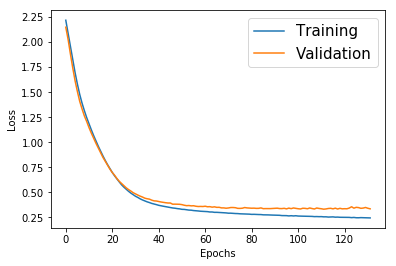

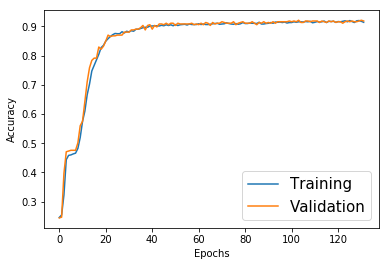

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist3).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist3)', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist3.history['acc'])
plt.plot(hist3.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist3).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist3)', format='eps', dpi=1000)

In [41]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adagrad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist4=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1176 samples, validate on 393 samples
Epoch 1/3000
1176/1176 [==============================] - 1s 656us/step - loss: 2.0748 - acc: 0.2491 - val_loss: 1.9516 - val_acc: 0.2468
Epoch 2/3000
1176/1176 [==============================] - 0s 84us/step - loss: 1.8799 - acc: 0.2611 - val_loss: 1.8042 - val_acc: 0.2748
Epoch 3/3000
1176/1176 [==============================] - 0s 78us/step - loss: 1.7364 - acc: 0.3622 - val_loss: 1.6612 - val_acc: 0.4377
Epoch 4/3000
1176/1176 [==============================] - 0s 80us/step - loss: 1.6049 - acc: 0.4651 - val_loss: 1.5368 - val_acc: 0.4860
Epoch 5/3000
1176/1176 [==============================] - 0s 77us/step - loss: 1.4850 - acc: 0.4906 - val_loss: 1.4243 - val_acc: 0.4936
Epoch 6/3000
1176/1176 [==============================] - 0s 79us/step - loss: 1.3848 - acc: 0.5017 - val_loss: 1.3398 - val_acc: 0.5369
Epoch 7/3000
1176/1176 [==============================] - 0s 85us/step - loss: 1.3022 - acc: 0.5374 - val_loss: 1.2589 - val_acc: 

Epoch 60/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.4635 - acc: 0.8903 - val_loss: 0.4973 - val_acc: 0.8880
Epoch 61/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.4604 - acc: 0.8903 - val_loss: 0.4946 - val_acc: 0.8880
Epoch 62/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.4572 - acc: 0.8937 - val_loss: 0.4925 - val_acc: 0.8880
Epoch 63/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.4544 - acc: 0.8903 - val_loss: 0.4901 - val_acc: 0.8906
Epoch 64/3000
1176/1176 [==============================] - 0s 53us/step - loss: 0.4515 - acc: 0.8912 - val_loss: 0.4885 - val_acc: 0.8957
Epoch 65/3000
1176/1176 [==============================] - 0s 86us/step - loss: 0.4483 - acc: 0.8912 - val_loss: 0.4849 - val_acc: 0.8931
Epoch 66/3000
1176/1176 [==============================] - 0s 75us/step - loss: 0.4460 - acc: 0.8937 - val_loss: 0.4818 - val_acc: 0.8880
Epoch 67/3000
1176/1176 [=========

1176/1176 [==============================] - 0s 77us/step - loss: 0.3319 - acc: 0.9031 - val_loss: 0.3793 - val_acc: 0.9211
Epoch 179/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.3315 - acc: 0.9022 - val_loss: 0.3788 - val_acc: 0.9211
Epoch 180/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.3311 - acc: 0.9031 - val_loss: 0.3782 - val_acc: 0.9211
Epoch 181/3000
1176/1176 [==============================] - 0s 77us/step - loss: 0.3309 - acc: 0.9039 - val_loss: 0.3787 - val_acc: 0.9211
Epoch 182/3000
1176/1176 [==============================] - 0s 66us/step - loss: 0.3306 - acc: 0.9031 - val_loss: 0.3782 - val_acc: 0.9211
Epoch 183/3000
1176/1176 [==============================] - 0s 83us/step - loss: 0.3300 - acc: 0.9031 - val_loss: 0.3771 - val_acc: 0.9211
Epoch 184/3000
1176/1176 [==============================] - 0s 85us/step - loss: 0.3294 - acc: 0.9039 - val_loss: 0.3774 - val_acc: 0.9211
Epoch 185/3000
1176/1176 [================

Epoch 237/3000
1176/1176 [==============================] - 0s 85us/step - loss: 0.3140 - acc: 0.9048 - val_loss: 0.3629 - val_acc: 0.9211
Epoch 238/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.3137 - acc: 0.9056 - val_loss: 0.3632 - val_acc: 0.9211
Epoch 239/3000
1176/1176 [==============================] - 0s 77us/step - loss: 0.3137 - acc: 0.9048 - val_loss: 0.3632 - val_acc: 0.9211
Epoch 240/3000
1176/1176 [==============================] - 0s 77us/step - loss: 0.3130 - acc: 0.9065 - val_loss: 0.3637 - val_acc: 0.9211
Epoch 241/3000
1176/1176 [==============================] - 0s 94us/step - loss: 0.3128 - acc: 0.9056 - val_loss: 0.3621 - val_acc: 0.9211
Epoch 242/3000
1176/1176 [==============================] - 0s 142us/step - loss: 0.3127 - acc: 0.9056 - val_loss: 0.3617 - val_acc: 0.9211
Epoch 243/3000
1176/1176 [==============================] - 0s 138us/step - loss: 0.3125 - acc: 0.9048 - val_loss: 0.3618 - val_acc: 0.9211
Epoch 244/3000
1176/1176 

1176/1176 [==============================] - 0s 75us/step - loss: 0.2931 - acc: 0.9099 - val_loss: 0.3436 - val_acc: 0.9211
Epoch 355/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.2930 - acc: 0.9107 - val_loss: 0.3435 - val_acc: 0.9211
Epoch 356/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2928 - acc: 0.9099 - val_loss: 0.3430 - val_acc: 0.9211
Epoch 357/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2928 - acc: 0.9099 - val_loss: 0.3425 - val_acc: 0.9211
Epoch 358/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2925 - acc: 0.9090 - val_loss: 0.3426 - val_acc: 0.9211
Epoch 359/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2924 - acc: 0.9090 - val_loss: 0.3420 - val_acc: 0.9211
Epoch 360/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2922 - acc: 0.9099 - val_loss: 0.3415 - val_acc: 0.9211
Epoch 361/3000
1176/1176 [================

1176/1176 [==============================] - 0s 77us/step - loss: 0.2861 - acc: 0.9107 - val_loss: 0.3354 - val_acc: 0.9237
Epoch 414/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2860 - acc: 0.9099 - val_loss: 0.3353 - val_acc: 0.9237
Epoch 415/3000
1176/1176 [==============================] - 0s 69us/step - loss: 0.2860 - acc: 0.9099 - val_loss: 0.3354 - val_acc: 0.9237
Epoch 416/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.2859 - acc: 0.9090 - val_loss: 0.3351 - val_acc: 0.9211
Epoch 417/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2857 - acc: 0.9090 - val_loss: 0.3348 - val_acc: 0.9211
Epoch 418/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2856 - acc: 0.9099 - val_loss: 0.3349 - val_acc: 0.9237
Epoch 419/3000
1176/1176 [==============================] - 0s 77us/step - loss: 0.2855 - acc: 0.9099 - val_loss: 0.3348 - val_acc: 0.9237
Epoch 420/3000
1176/1176 [================

1176/1176 [==============================] - 0s 76us/step - loss: 0.2802 - acc: 0.9107 - val_loss: 0.3293 - val_acc: 0.9237
Epoch 473/3000
1176/1176 [==============================] - 0s 81us/step - loss: 0.2802 - acc: 0.9090 - val_loss: 0.3296 - val_acc: 0.9237
Epoch 474/3000
1176/1176 [==============================] - 0s 75us/step - loss: 0.2800 - acc: 0.9090 - val_loss: 0.3290 - val_acc: 0.9237
Epoch 475/3000
1176/1176 [==============================] - 0s 75us/step - loss: 0.2799 - acc: 0.9107 - val_loss: 0.3293 - val_acc: 0.9237
Epoch 476/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2798 - acc: 0.9090 - val_loss: 0.3293 - val_acc: 0.9237
Epoch 477/3000
1176/1176 [==============================] - 0s 75us/step - loss: 0.2798 - acc: 0.9107 - val_loss: 0.3294 - val_acc: 0.9237
Epoch 478/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.2797 - acc: 0.9099 - val_loss: 0.3299 - val_acc: 0.9237
Epoch 479/3000
1176/1176 [================

1176/1176 [==============================] - 0s 75us/step - loss: 0.2751 - acc: 0.9116 - val_loss: 0.3246 - val_acc: 0.9237
Epoch 532/3000
1176/1176 [==============================] - 0s 71us/step - loss: 0.2750 - acc: 0.9099 - val_loss: 0.3242 - val_acc: 0.9237
Epoch 533/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2749 - acc: 0.9107 - val_loss: 0.3246 - val_acc: 0.9237
Epoch 534/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2749 - acc: 0.9107 - val_loss: 0.3239 - val_acc: 0.9237
Epoch 535/3000
1176/1176 [==============================] - 0s 71us/step - loss: 0.2749 - acc: 0.9099 - val_loss: 0.3234 - val_acc: 0.9237
Epoch 536/3000
1176/1176 [==============================] - 0s 68us/step - loss: 0.2747 - acc: 0.9116 - val_loss: 0.3239 - val_acc: 0.9237
Epoch 537/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2747 - acc: 0.9107 - val_loss: 0.3233 - val_acc: 0.9237
Epoch 538/3000
1176/1176 [================

1176/1176 [==============================] - 0s 71us/step - loss: 0.2704 - acc: 0.9099 - val_loss: 0.3194 - val_acc: 0.9237
Epoch 591/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.2705 - acc: 0.9107 - val_loss: 0.3195 - val_acc: 0.9237
Epoch 592/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2705 - acc: 0.9133 - val_loss: 0.3186 - val_acc: 0.9237
Epoch 593/3000
1176/1176 [==============================] - 0s 71us/step - loss: 0.2704 - acc: 0.9116 - val_loss: 0.3182 - val_acc: 0.9237
Epoch 594/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.2703 - acc: 0.9116 - val_loss: 0.3184 - val_acc: 0.9237
Epoch 595/3000
1176/1176 [==============================] - 0s 79us/step - loss: 0.2702 - acc: 0.9116 - val_loss: 0.3185 - val_acc: 0.9237
Epoch 596/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2702 - acc: 0.9124 - val_loss: 0.3188 - val_acc: 0.9237
Epoch 597/3000
1176/1176 [================

1176/1176 [==============================] - 0s 76us/step - loss: 0.2667 - acc: 0.9124 - val_loss: 0.3147 - val_acc: 0.9237
Epoch 650/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2666 - acc: 0.9124 - val_loss: 0.3147 - val_acc: 0.9237
Epoch 651/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2666 - acc: 0.9133 - val_loss: 0.3143 - val_acc: 0.9237
Epoch 652/3000
1176/1176 [==============================] - 0s 71us/step - loss: 0.2664 - acc: 0.9124 - val_loss: 0.3143 - val_acc: 0.9237
Epoch 653/3000
1176/1176 [==============================] - 0s 70us/step - loss: 0.2665 - acc: 0.9124 - val_loss: 0.3143 - val_acc: 0.9237
Epoch 654/3000
1176/1176 [==============================] - 0s 75us/step - loss: 0.2663 - acc: 0.9116 - val_loss: 0.3151 - val_acc: 0.9237
Epoch 655/3000
1176/1176 [==============================] - 0s 75us/step - loss: 0.2664 - acc: 0.9124 - val_loss: 0.3143 - val_acc: 0.9237
Epoch 656/3000
1176/1176 [================

1176/1176 [==============================] - 0s 79us/step - loss: 0.2631 - acc: 0.9141 - val_loss: 0.3111 - val_acc: 0.9262
Epoch 709/3000
1176/1176 [==============================] - 0s 79us/step - loss: 0.2629 - acc: 0.9124 - val_loss: 0.3106 - val_acc: 0.9262
Epoch 710/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2627 - acc: 0.9124 - val_loss: 0.3108 - val_acc: 0.9262
Epoch 711/3000
1176/1176 [==============================] - 0s 80us/step - loss: 0.2627 - acc: 0.9133 - val_loss: 0.3112 - val_acc: 0.9262
Epoch 712/3000
1176/1176 [==============================] - 0s 94us/step - loss: 0.2626 - acc: 0.9133 - val_loss: 0.3105 - val_acc: 0.9262
Epoch 713/3000
1176/1176 [==============================] - 0s 92us/step - loss: 0.2625 - acc: 0.9133 - val_loss: 0.3110 - val_acc: 0.9262
Epoch 714/3000
1176/1176 [==============================] - 0s 86us/step - loss: 0.2626 - acc: 0.9133 - val_loss: 0.3106 - val_acc: 0.9262
Epoch 715/3000
1176/1176 [================

1176/1176 [==============================] - 0s 72us/step - loss: 0.2594 - acc: 0.9141 - val_loss: 0.3071 - val_acc: 0.9262
Epoch 768/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2593 - acc: 0.9141 - val_loss: 0.3076 - val_acc: 0.9262
Epoch 769/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2595 - acc: 0.9141 - val_loss: 0.3073 - val_acc: 0.9262
Epoch 770/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.2592 - acc: 0.9141 - val_loss: 0.3071 - val_acc: 0.9262
Epoch 771/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2591 - acc: 0.9133 - val_loss: 0.3068 - val_acc: 0.9262
Epoch 772/3000
1176/1176 [==============================] - 0s 70us/step - loss: 0.2592 - acc: 0.9124 - val_loss: 0.3068 - val_acc: 0.9262
Epoch 773/3000
1176/1176 [==============================] - 0s 77us/step - loss: 0.2592 - acc: 0.9133 - val_loss: 0.3073 - val_acc: 0.9262
Epoch 774/3000
1176/1176 [================

1176/1176 [==============================] - 0s 79us/step - loss: 0.2563 - acc: 0.9150 - val_loss: 0.3051 - val_acc: 0.9262
Epoch 827/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.2561 - acc: 0.9141 - val_loss: 0.3049 - val_acc: 0.9262
Epoch 828/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2560 - acc: 0.9158 - val_loss: 0.3040 - val_acc: 0.9262
Epoch 829/3000
1176/1176 [==============================] - 0s 86us/step - loss: 0.2562 - acc: 0.9133 - val_loss: 0.3040 - val_acc: 0.9262
Epoch 830/3000
1176/1176 [==============================] - 0s 115us/step - loss: 0.2559 - acc: 0.9141 - val_loss: 0.3044 - val_acc: 0.9262
Epoch 831/3000
1176/1176 [==============================] - 0s 89us/step - loss: 0.2561 - acc: 0.9141 - val_loss: 0.3044 - val_acc: 0.9262
Epoch 832/3000
1176/1176 [==============================] - 0s 98us/step - loss: 0.2559 - acc: 0.9150 - val_loss: 0.3042 - val_acc: 0.9262
Epoch 833/3000
1176/1176 [===============

1176/1176 [==============================] - 0s 74us/step - loss: 0.2533 - acc: 0.9150 - val_loss: 0.3017 - val_acc: 0.9262
Epoch 886/3000
1176/1176 [==============================] - 0s 77us/step - loss: 0.2533 - acc: 0.9141 - val_loss: 0.3019 - val_acc: 0.9262
Epoch 887/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2532 - acc: 0.9150 - val_loss: 0.3018 - val_acc: 0.9262
Epoch 888/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2532 - acc: 0.9141 - val_loss: 0.3019 - val_acc: 0.9262
Epoch 889/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2531 - acc: 0.9141 - val_loss: 0.3017 - val_acc: 0.9262
Epoch 890/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2530 - acc: 0.9150 - val_loss: 0.3017 - val_acc: 0.9262
Epoch 891/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.2530 - acc: 0.9141 - val_loss: 0.3020 - val_acc: 0.9262
Epoch 892/3000
1176/1176 [================

1176/1176 [==============================] - 0s 97us/step - loss: 0.2507 - acc: 0.9150 - val_loss: 0.2994 - val_acc: 0.9262
Epoch 945/3000
1176/1176 [==============================] - 0s 83us/step - loss: 0.2504 - acc: 0.9141 - val_loss: 0.2991 - val_acc: 0.9262
Epoch 946/3000
1176/1176 [==============================] - 0s 81us/step - loss: 0.2505 - acc: 0.9141 - val_loss: 0.2990 - val_acc: 0.9262
Epoch 947/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2503 - acc: 0.9150 - val_loss: 0.2990 - val_acc: 0.9262
Epoch 948/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2503 - acc: 0.9150 - val_loss: 0.2990 - val_acc: 0.9262
Epoch 949/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2503 - acc: 0.9141 - val_loss: 0.2993 - val_acc: 0.9262
Epoch 950/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2503 - acc: 0.9141 - val_loss: 0.2987 - val_acc: 0.9262
Epoch 951/3000
1176/1176 [================

Epoch 1003/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2480 - acc: 0.9133 - val_loss: 0.2965 - val_acc: 0.9237
Epoch 1004/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2478 - acc: 0.9150 - val_loss: 0.2968 - val_acc: 0.9237
Epoch 1005/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2478 - acc: 0.9150 - val_loss: 0.2964 - val_acc: 0.9262
Epoch 1006/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2478 - acc: 0.9141 - val_loss: 0.2964 - val_acc: 0.9237
Epoch 1007/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2479 - acc: 0.9133 - val_loss: 0.2966 - val_acc: 0.9237
Epoch 1008/3000
1176/1176 [==============================] - 0s 70us/step - loss: 0.2477 - acc: 0.9150 - val_loss: 0.2964 - val_acc: 0.9237
Epoch 1009/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2477 - acc: 0.9150 - val_loss: 0.2965 - val_acc: 0.9237
Epoch 1010/3000
1176

1176/1176 [==============================] - 0s 86us/step - loss: 0.2431 - acc: 0.9158 - val_loss: 0.2919 - val_acc: 0.9237
Epoch 1120/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.2431 - acc: 0.9150 - val_loss: 0.2919 - val_acc: 0.9237
Epoch 1121/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.2430 - acc: 0.9167 - val_loss: 0.2917 - val_acc: 0.9237
Epoch 1122/3000
1176/1176 [==============================] - 0s 71us/step - loss: 0.2430 - acc: 0.9167 - val_loss: 0.2918 - val_acc: 0.9237
Epoch 1123/3000
1176/1176 [==============================] - 0s 77us/step - loss: 0.2429 - acc: 0.9141 - val_loss: 0.2920 - val_acc: 0.9237
Epoch 1124/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2429 - acc: 0.9158 - val_loss: 0.2920 - val_acc: 0.9237
Epoch 1125/3000
1176/1176 [==============================] - 0s 75us/step - loss: 0.2429 - acc: 0.9158 - val_loss: 0.2920 - val_acc: 0.9237
Epoch 1126/3000
1176/1176 [=========

1176/1176 [==============================] - 0s 73us/step - loss: 0.2386 - acc: 0.9158 - val_loss: 0.2878 - val_acc: 0.9237
Epoch 1236/3000
1176/1176 [==============================] - 0s 71us/step - loss: 0.2386 - acc: 0.9175 - val_loss: 0.2877 - val_acc: 0.9262
Epoch 1237/3000
1176/1176 [==============================] - 0s 71us/step - loss: 0.2385 - acc: 0.9184 - val_loss: 0.2875 - val_acc: 0.9237
Epoch 1238/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2386 - acc: 0.9184 - val_loss: 0.2874 - val_acc: 0.9237
Epoch 1239/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2386 - acc: 0.9167 - val_loss: 0.2877 - val_acc: 0.9237
Epoch 1240/3000
1176/1176 [==============================] - 0s 72us/step - loss: 0.2385 - acc: 0.9167 - val_loss: 0.2877 - val_acc: 0.9262
Epoch 1241/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.2386 - acc: 0.9158 - val_loss: 0.2877 - val_acc: 0.9262
Epoch 1242/3000
1176/1176 [=========

1176/1176 [==============================] - 0s 79us/step - loss: 0.2346 - acc: 0.9192 - val_loss: 0.2845 - val_acc: 0.9288
Epoch 1352/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.2346 - acc: 0.9184 - val_loss: 0.2843 - val_acc: 0.9288
Epoch 1353/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.2344 - acc: 0.9201 - val_loss: 0.2836 - val_acc: 0.9262
Epoch 1354/3000
1176/1176 [==============================] - 0s 74us/step - loss: 0.2347 - acc: 0.9184 - val_loss: 0.2838 - val_acc: 0.9262
Epoch 1355/3000
1176/1176 [==============================] - 0s 89us/step - loss: 0.2345 - acc: 0.9184 - val_loss: 0.2840 - val_acc: 0.9288
Epoch 1356/3000
1176/1176 [==============================] - 0s 101us/step - loss: 0.2344 - acc: 0.9167 - val_loss: 0.2841 - val_acc: 0.9288
Epoch 1357/3000
1176/1176 [==============================] - 0s 103us/step - loss: 0.2345 - acc: 0.9184 - val_loss: 0.2842 - val_acc: 0.9288
Epoch 1358/3000
1176/1176 [=======

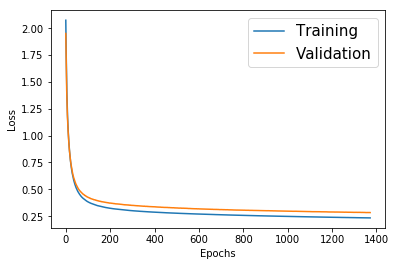

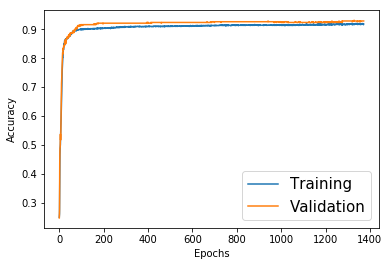

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist4).fig', format='eps', dpi=1000)
plt.savefig('loss with adam(hist4).eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist4.history['acc'])
plt.plot(hist4.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist4).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam(hist4).eps', format='eps', dpi=1000)

In [44]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist5=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1176 samples, validate on 393 samples
Epoch 1/3000
1176/1176 [==============================] - 1s 742us/step - loss: 2.2111 - acc: 0.3478 - val_loss: 2.1253 - val_acc: 0.3461
Epoch 2/3000
1176/1176 [==============================] - 0s 85us/step - loss: 2.0503 - acc: 0.3410 - val_loss: 1.9649 - val_acc: 0.2824
Epoch 3/3000
1176/1176 [==============================] - 0s 78us/step - loss: 1.9093 - acc: 0.3520 - val_loss: 1.8437 - val_acc: 0.3944
Epoch 4/3000
1176/1176 [==============================] - 0s 83us/step - loss: 1.8042 - acc: 0.4031 - val_loss: 1.7458 - val_acc: 0.4631
Epoch 5/3000
1176/1176 [==============================] - 0s 83us/step - loss: 1.6999 - acc: 0.4532 - val_loss: 1.6439 - val_acc: 0.4758
Epoch 6/3000
1176/1176 [==============================] - 0s 87us/step - loss: 1.5942 - acc: 0.4677 - val_loss: 1.5418 - val_acc: 0.4809
Epoch 7/3000
1176/1176 [==============================] - 0s 85us/step - loss: 1.4953 - acc: 0.4804 - val_loss: 1.4494 - val_acc: 

1176/1176 [==============================] - 0s 86us/step - loss: 0.3432 - acc: 0.9048 - val_loss: 0.3869 - val_acc: 0.9135
Epoch 61/3000
1176/1176 [==============================] - 0s 86us/step - loss: 0.3412 - acc: 0.9022 - val_loss: 0.3875 - val_acc: 0.9186
Epoch 62/3000
1176/1176 [==============================] - 0s 75us/step - loss: 0.3395 - acc: 0.9014 - val_loss: 0.3837 - val_acc: 0.9160
Epoch 63/3000
1176/1176 [==============================] - 0s 77us/step - loss: 0.3380 - acc: 0.9022 - val_loss: 0.3828 - val_acc: 0.9186
Epoch 64/3000
1176/1176 [==============================] - 0s 73us/step - loss: 0.3353 - acc: 0.9065 - val_loss: 0.3799 - val_acc: 0.9186
Epoch 65/3000
1176/1176 [==============================] - 0s 81us/step - loss: 0.3327 - acc: 0.9082 - val_loss: 0.3798 - val_acc: 0.9211
Epoch 66/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.3313 - acc: 0.9048 - val_loss: 0.3784 - val_acc: 0.9160
Epoch 67/3000
1176/1176 [=======================

Epoch 119/3000
1176/1176 [==============================] - 0s 82us/step - loss: 0.2787 - acc: 0.9099 - val_loss: 0.3246 - val_acc: 0.9288
Epoch 120/3000
1176/1176 [==============================] - 0s 86us/step - loss: 0.2782 - acc: 0.9124 - val_loss: 0.3258 - val_acc: 0.9338
Epoch 121/3000
1176/1176 [==============================] - 0s 113us/step - loss: 0.2770 - acc: 0.9107 - val_loss: 0.3289 - val_acc: 0.9211
Epoch 122/3000
1176/1176 [==============================] - 0s 122us/step - loss: 0.2782 - acc: 0.9116 - val_loss: 0.3226 - val_acc: 0.9237
Epoch 123/3000
1176/1176 [==============================] - 0s 96us/step - loss: 0.2757 - acc: 0.9116 - val_loss: 0.3244 - val_acc: 0.9288
Epoch 124/3000
1176/1176 [==============================] - 0s 84us/step - loss: 0.2754 - acc: 0.9116 - val_loss: 0.3223 - val_acc: 0.9288
Epoch 125/3000
1176/1176 [==============================] - 0s 82us/step - loss: 0.2756 - acc: 0.9133 - val_loss: 0.3240 - val_acc: 0.9262
Epoch 126/3000
1176/1176 

1176/1176 [==============================] - 0s 81us/step - loss: 0.2485 - acc: 0.9124 - val_loss: 0.2968 - val_acc: 0.9262
Epoch 178/3000
1176/1176 [==============================] - 0s 77us/step - loss: 0.2505 - acc: 0.9167 - val_loss: 0.2950 - val_acc: 0.9313
Epoch 179/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.2499 - acc: 0.9158 - val_loss: 0.2961 - val_acc: 0.9262
Epoch 180/3000
1176/1176 [==============================] - 0s 78us/step - loss: 0.2487 - acc: 0.9150 - val_loss: 0.2945 - val_acc: 0.9262
Epoch 181/3000
1176/1176 [==============================] - 0s 80us/step - loss: 0.2482 - acc: 0.9158 - val_loss: 0.2959 - val_acc: 0.9288
Epoch 182/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.2486 - acc: 0.9141 - val_loss: 0.2975 - val_acc: 0.9262
Epoch 183/3000
1176/1176 [==============================] - 0s 81us/step - loss: 0.2474 - acc: 0.9150 - val_loss: 0.2943 - val_acc: 0.9313
Epoch 184/3000
1176/1176 [================

Epoch 294/3000
1176/1176 [==============================] - 0s 93us/step - loss: 0.2140 - acc: 0.9243 - val_loss: 0.2656 - val_acc: 0.9313
Epoch 295/3000
1176/1176 [==============================] - 0s 82us/step - loss: 0.2130 - acc: 0.9311 - val_loss: 0.2674 - val_acc: 0.9313
Epoch 296/3000
1176/1176 [==============================] - 0s 81us/step - loss: 0.2126 - acc: 0.9277 - val_loss: 0.2712 - val_acc: 0.9364
Epoch 297/3000
1176/1176 [==============================] - 0s 88us/step - loss: 0.2115 - acc: 0.9277 - val_loss: 0.2671 - val_acc: 0.9288
Epoch 298/3000
1176/1176 [==============================] - 0s 93us/step - loss: 0.2132 - acc: 0.9294 - val_loss: 0.2651 - val_acc: 0.9313
Epoch 299/3000
1176/1176 [==============================] - 0s 82us/step - loss: 0.2128 - acc: 0.9320 - val_loss: 0.2644 - val_acc: 0.9313
Epoch 300/3000
1176/1176 [==============================] - 0s 84us/step - loss: 0.2114 - acc: 0.9269 - val_loss: 0.2699 - val_acc: 0.9338
Epoch 301/3000
1176/1176 [=

Epoch 411/3000
1176/1176 [==============================] - 0s 88us/step - loss: 0.1845 - acc: 0.9371 - val_loss: 0.2514 - val_acc: 0.9364
Epoch 412/3000
1176/1176 [==============================] - 0s 76us/step - loss: 0.1841 - acc: 0.9345 - val_loss: 0.2576 - val_acc: 0.9364
Epoch 413/3000
1176/1176 [==============================] - 0s 79us/step - loss: 0.1856 - acc: 0.9345 - val_loss: 0.2481 - val_acc: 0.9338
Epoch 414/3000
1176/1176 [==============================] - 0s 75us/step - loss: 0.1881 - acc: 0.9362 - val_loss: 0.2535 - val_acc: 0.9262
Epoch 415/3000
1176/1176 [==============================] - 0s 81us/step - loss: 0.1827 - acc: 0.9354 - val_loss: 0.2528 - val_acc: 0.9262
Epoch 416/3000
1176/1176 [==============================] - 0s 84us/step - loss: 0.1836 - acc: 0.9379 - val_loss: 0.2518 - val_acc: 0.9338
Epoch 417/3000
1176/1176 [==============================] - 0s 79us/step - loss: 0.1840 - acc: 0.9371 - val_loss: 0.2539 - val_acc: 0.9364
Epoch 418/3000
1176/1176 [=

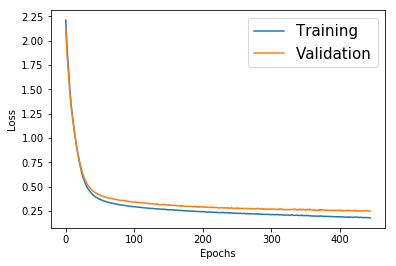

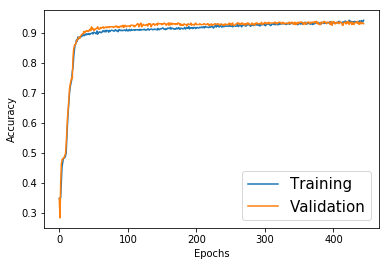

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist5).fig', format='eps', dpi=1000)
plt.savefig('loss with adam(hist5).eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist5.history['acc'])
plt.plot(hist5.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist5).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam(hist5).eps', format='eps', dpi=1000)

In [47]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist6=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1176 samples, validate on 393 samples
Epoch 1/3000
1176/1176 [==============================] - 1s 899us/step - loss: 2.2614 - acc: 0.2219 - val_loss: 2.1327 - val_acc: 0.4682
Epoch 2/3000
1176/1176 [==============================] - 0s 107us/step - loss: 1.9572 - acc: 0.4541 - val_loss: 1.7892 - val_acc: 0.4656
Epoch 3/3000
1176/1176 [==============================] - 0s 90us/step - loss: 1.6736 - acc: 0.4575 - val_loss: 1.5242 - val_acc: 0.4707
Epoch 4/3000
1176/1176 [==============================] - 0s 96us/step - loss: 1.4598 - acc: 0.4600 - val_loss: 1.3724 - val_acc: 0.4758
Epoch 5/3000
1176/1176 [==============================] - 0s 87us/step - loss: 1.3156 - acc: 0.4779 - val_loss: 1.2329 - val_acc: 0.5140
Epoch 6/3000
1176/1176 [==============================] - 0s 88us/step - loss: 1.1892 - acc: 0.5502 - val_loss: 1.1251 - val_acc: 0.5878
Epoch 7/3000
1176/1176 [==============================] - 0s 88us/step - loss: 1.0724 - acc: 0.6156 - val_loss: 1.0230 - val_acc:

1176/1176 [==============================] - 0s 88us/step - loss: 0.2951 - acc: 0.9090 - val_loss: 0.3297 - val_acc: 0.9084
Epoch 61/3000
1176/1176 [==============================] - 0s 82us/step - loss: 0.2940 - acc: 0.9099 - val_loss: 0.3279 - val_acc: 0.9160
Epoch 62/3000
1176/1176 [==============================] - 0s 84us/step - loss: 0.2921 - acc: 0.9073 - val_loss: 0.3314 - val_acc: 0.9135
Epoch 63/3000
1176/1176 [==============================] - 0s 83us/step - loss: 0.2916 - acc: 0.9107 - val_loss: 0.3313 - val_acc: 0.9084
Epoch 64/3000
1176/1176 [==============================] - 0s 86us/step - loss: 0.2914 - acc: 0.9090 - val_loss: 0.3285 - val_acc: 0.9211
Epoch 65/3000
1176/1176 [==============================] - 0s 95us/step - loss: 0.2909 - acc: 0.9082 - val_loss: 0.3352 - val_acc: 0.9084
Epoch 66/3000
1176/1176 [==============================] - 0s 81us/step - loss: 0.2910 - acc: 0.9124 - val_loss: 0.3368 - val_acc: 0.9059
Epoch 67/3000
1176/1176 [=======================

1176/1176 [==============================] - 0s 123us/step - loss: 0.2515 - acc: 0.9209 - val_loss: 0.2996 - val_acc: 0.9211
Epoch 120/3000
1176/1176 [==============================] - 0s 129us/step - loss: 0.2534 - acc: 0.9175 - val_loss: 0.3042 - val_acc: 0.9160
Epoch 121/3000
1176/1176 [==============================] - 0s 94us/step - loss: 0.2520 - acc: 0.9175 - val_loss: 0.3164 - val_acc: 0.9211
Epoch 122/3000
1176/1176 [==============================] - 0s 92us/step - loss: 0.2530 - acc: 0.9192 - val_loss: 0.2977 - val_acc: 0.9237
Epoch 123/3000
1176/1176 [==============================] - 0s 87us/step - loss: 0.2516 - acc: 0.9192 - val_loss: 0.3001 - val_acc: 0.9211
Epoch 124/3000
1176/1176 [==============================] - 0s 84us/step - loss: 0.2491 - acc: 0.9218 - val_loss: 0.3018 - val_acc: 0.9135
Epoch 125/3000
1176/1176 [==============================] - 0s 90us/step - loss: 0.2493 - acc: 0.9184 - val_loss: 0.3004 - val_acc: 0.9160
Epoch 126/3000
1176/1176 [==============

1176/1176 [==============================] - 0s 87us/step - loss: 0.2264 - acc: 0.9218 - val_loss: 0.2861 - val_acc: 0.9211
Epoch 179/3000
1176/1176 [==============================] - 0s 89us/step - loss: 0.2240 - acc: 0.9243 - val_loss: 0.2874 - val_acc: 0.9160
Epoch 180/3000
1176/1176 [==============================] - 0s 88us/step - loss: 0.2225 - acc: 0.9243 - val_loss: 0.2819 - val_acc: 0.9262
Epoch 181/3000
1176/1176 [==============================] - 0s 86us/step - loss: 0.2250 - acc: 0.9260 - val_loss: 0.2819 - val_acc: 0.9211
Epoch 182/3000
1176/1176 [==============================] - 0s 87us/step - loss: 0.2247 - acc: 0.9269 - val_loss: 0.2896 - val_acc: 0.9109
Epoch 183/3000
1176/1176 [==============================] - 0s 88us/step - loss: 0.2253 - acc: 0.9269 - val_loss: 0.2909 - val_acc: 0.9160
Epoch 184/3000
1176/1176 [==============================] - 0s 84us/step - loss: 0.2226 - acc: 0.9235 - val_loss: 0.2824 - val_acc: 0.9211
Epoch 185/3000
1176/1176 [================

Epoch 237/3000
1176/1176 [==============================] - 0s 90us/step - loss: 0.2040 - acc: 0.9337 - val_loss: 0.2685 - val_acc: 0.9186
Epoch 238/3000
1176/1176 [==============================] - 0s 84us/step - loss: 0.2011 - acc: 0.9354 - val_loss: 0.2838 - val_acc: 0.9211
Epoch 239/3000
1176/1176 [==============================] - 0s 84us/step - loss: 0.2061 - acc: 0.9303 - val_loss: 0.2662 - val_acc: 0.9288
Epoch 240/3000
1176/1176 [==============================] - 0s 93us/step - loss: 0.2039 - acc: 0.9328 - val_loss: 0.2750 - val_acc: 0.9364
Epoch 241/3000
1176/1176 [==============================] - 0s 85us/step - loss: 0.2023 - acc: 0.9320 - val_loss: 0.2699 - val_acc: 0.9338
Epoch 242/3000
1176/1176 [==============================] - 0s 82us/step - loss: 0.2018 - acc: 0.9354 - val_loss: 0.2693 - val_acc: 0.9237
Epoch 243/3000
1176/1176 [==============================] - 0s 79us/step - loss: 0.2008 - acc: 0.9354 - val_loss: 0.2762 - val_acc: 0.9262
Epoch 244/3000
1176/1176 [=

1176/1176 [==============================] - 0s 85us/step - loss: 0.1707 - acc: 0.9439 - val_loss: 0.2429 - val_acc: 0.9440
Epoch 355/3000
1176/1176 [==============================] - 0s 100us/step - loss: 0.1693 - acc: 0.9447 - val_loss: 0.2409 - val_acc: 0.9338
Epoch 356/3000
1176/1176 [==============================] - 0s 86us/step - loss: 0.1694 - acc: 0.9439 - val_loss: 0.2413 - val_acc: 0.9211
Epoch 357/3000
1176/1176 [==============================] - 0s 82us/step - loss: 0.1679 - acc: 0.9439 - val_loss: 0.2382 - val_acc: 0.9288
Epoch 358/3000
1176/1176 [==============================] - 0s 92us/step - loss: 0.1701 - acc: 0.9439 - val_loss: 0.2341 - val_acc: 0.9338
Epoch 359/3000
1176/1176 [==============================] - 0s 91us/step - loss: 0.1690 - acc: 0.9430 - val_loss: 0.2395 - val_acc: 0.9313
Epoch 360/3000
1176/1176 [==============================] - 0s 87us/step - loss: 0.1675 - acc: 0.9490 - val_loss: 0.2475 - val_acc: 0.9262
Epoch 361/3000
1176/1176 [===============

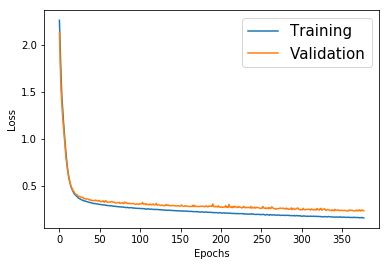

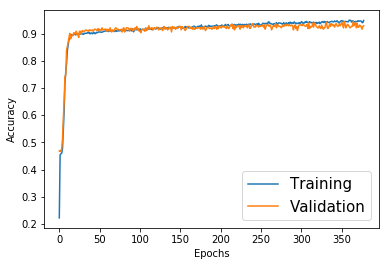

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist6).fig', format='eps', dpi=1000)
plt.savefig('loss with adam(hist6).eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist6.history['acc'])
plt.plot(hist6.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist6).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam(hist6).eps', format='eps', dpi=1000)

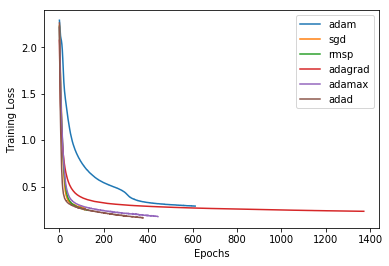

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.plot(hist.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.plot(hist5.history['loss'])
plt.plot(hist6.history['loss'])
plt.savefig('loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('loss with diff. optimizers.eps', format='eps', dpi=1000)
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])

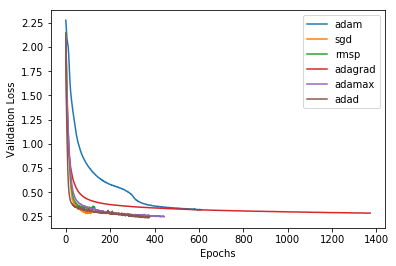

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
#plt.plot(hist1.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
#plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
#plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
#plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
#plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('Validation loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('Validation loss with diff. optimizers.eps', format='eps', dpi=1000)

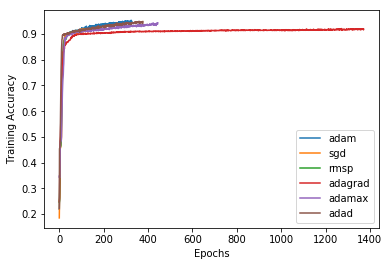

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(hist1.history['acc'])
#plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['acc'])
#plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['acc'])
#plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['acc'])
#plt.plot(hist4.history['val_loss'])
plt.plot(hist5.history['acc'])
#plt.plot(hist5.history['val_loss'])
plt.plot(hist6.history['acc'])
#plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('training accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('training accuracy with diff. optimizers.eps', format='eps', dpi=1000)

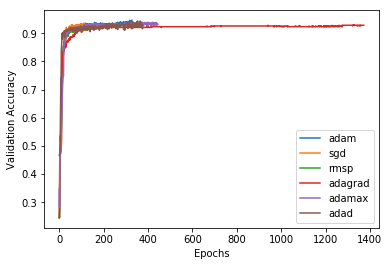

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(hist1.history['val_acc'])
plt.plot(hist2.history['val_acc'])
plt.plot(hist3.history['val_acc'])
plt.plot(hist4.history['val_acc'])
plt.plot(hist5.history['val_acc'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('validation accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('validation accuracy with diff. optimizers.eps', format='eps', dpi=1000)